# Data Collection Using APIs with Python

In [1]:
import requests
import base64

# replace with your own client id and client secret
CLIENT_ID = 'Your Client ID'
CLIENT_SECRET = 'Your Client Secret'

# Base64 encode the client id and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


The access token you obtain is essential for making further requests to the Spotify API, as it authenticates and authorizes these requests. Without this token, your application will not be able to interact with Spotify’s data and services using the Client Credentials flow. This flow is designed for server-to-server communication where user authorization isn’t needed, making it ideal for accessing public information like music data and playlists.

### Now, we will install Spotify’s official Python API known as Spotipy. we can install it on our Python environment by executing the command below on our terminal or command prompt:
* pip install spotipy

## extracting detailed information about each track in any Spotify playlist

In [4]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

def get_trending_playlist_data(playlist_id, access_token):
    # set up spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)

    # get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None,
            # add more attributes as needed (go through the spotify developer documentation to know what more you can add)
        }

        music_data.append(track_data)

    # create a pandas dataframe from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

## Now, we will use our function **get_trending_playlist_data** using a specific Spotify playlist ID and an already obtained access token

In [6]:
# we can add the playlist id of any playlist on Spotify here
playlist_id = '0n81ha8dSdYLDVc8VpCPsd'

# call the function to get the music data from the playlist and store it in a DataFrame
music_df = get_trending_playlist_data(playlist_id, access_token)

print(music_df)

               Track Name                                Artists  \
0              Let Her Go              lost., Honeyfox, Pop Mage   
1                    STAY                       Pop Mage, Alexia   
2                Fast Car                     Jonas Blue, Dakota   
3         Won’t Be Around        Swisha T, Saxon Davis, Mandrazo   
4               Strangers                            Kenya Grace   
..                    ...                                    ...   
95            Unstoppable     Pop Mage, Sup I'm Bianca, Mandrazo   
96                  Cupid             Pop Mage, JustCosplaySings   
97   Just The Way You Are  Pop Mage, ThatMikeGuy, Sup I'm Bianca   
98  We Don’t Talk Anymore                       CALLME, Pop Mage   
99              Apologies                       Gorden with an E   

               Album Name                Album ID                Track ID  \
0              Let Her Go  5TtIjaA0JhuVHUjscWJKSm  2o4KEc2eSVUytZvTzrmyDB   
1                    STAY  6O

### To get the playlist ID of any other playlist on Spotify, just copy the link of the playlist and below is how to identify the playlist ID from the URL of the playlist:
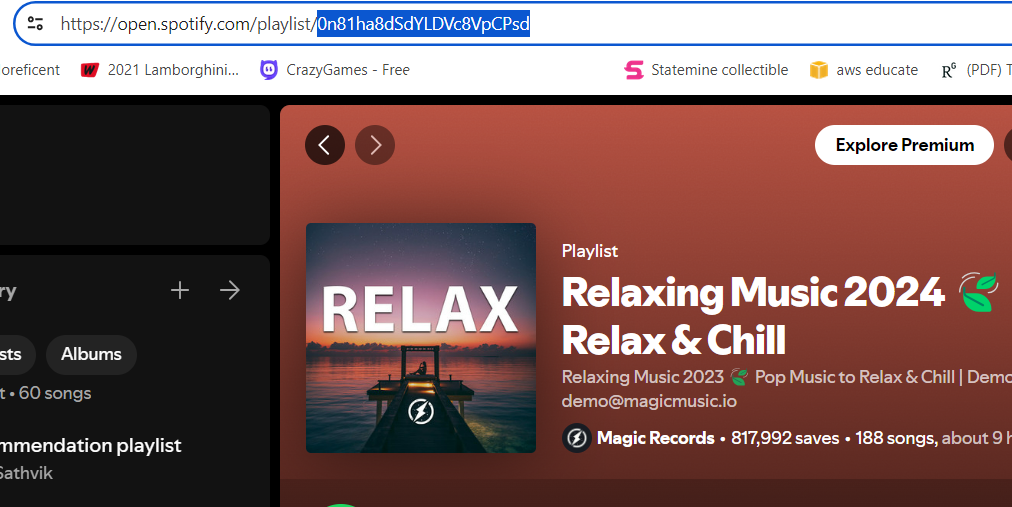


## Now, here’s how we can add this data to a CSV file

In [7]:
music_df.to_csv("musicdata.csv")